# Python Test 

In [296]:
# do not print matching warnings that does not warrant raising exception or terminating program
import warnings
warnings.filterwarnings("ignore")

In [297]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import arch
from statsmodels.tsa.stattools import adfuller # Agumented Dickey-Fuller Test
import statsmodels.api as sm # OLS regression
import matplotlib.patches as mpatches

If you encounter any issues answering a question, feel free to skip it or find an alternative solution. When you deem it beneficial, please comment on or explain your code. We encourage you to `type your variable`.

Good luck!

### **Table encoding all variables and their meaning:**

|Commodity            |Symbol             |Currency| Description                                         |
|---------------------|-------------------|:------:|-----------------------------------------------------|
|Gold                 |XAU Curncy         |USD     |Spot price of gold                                   |
|Silver               |XAG Curncy         |USD     |Spot price of silver                                 |
|Copper               |HGA Comdty         |USD     |High-grade copper futures                            |
|Aluminium            |LAA Comdty         |USD     |Aluminium futures                                    |
|Zinc                 |LXA Comdty         |USD     |Zinc futures                                         |
|Steel Hot Rolled Coil|HRCA Comdty        |USD     |US Midwest domestic steel prices                     |
|Wheat Chicago        |W A Comdty         |USD     |CBOT wheat futures                                   |
|Wheat Minneapolis    |MWA Comdty         |USD     |MGEX spring wheat futures                            |
|Wheat Matif          |CAA Comdty         |EUR     |Paris (MATIF) milling wheat futures                  |
|Corn                 |C A Comdty         |USD     |CBOT corn futures                                    |
|Soybean              |S A Comdty         |USD     |CBOT soybean futures                                 |
|Live Cattle          |LCA Comdty         |USD     |CME live cattle futures                              |
|Lean Hogs            |LHA Comdty         |USD     |CME lean hog futures                                 |
|Lumber               |LBOA Comdty        |USD     |CME random length lumber futures                     |
|Coffee               |KCA Comdty         |USD     |ICE Arabica coffee futures                           |
|Sugar                |SBA Comdty         |USD     |ICE raw sugar futures                                |
|Cocoa                |CCA Comdty         |USD     |ICE cocoa futures                                    |
|WTI                  |CLA Comdty         |USD     |NYMEX West Texas Intermediate crude oil futures      |
|Brent                |COA Comdty         |USD     |ICE Brent crude oil futures                          |
|RBOB                 |XBA Comdty         |USD     |NYMEX reformulated gasoline blendstock futures       |
|Heating Oil          |HOA Comdty         |USD     |NYMEX heating oil futures                            |
|IPE Gasoil           |QSA Comdty         |USD     |ICE gasoil (diesel) futures                          |
|TC2 37kt             |TC2FM1 MRXI Index  |USD     |Northwest Europe to U.S. Atlantic Coast freight rate|
|EURUSD               |EURUSD Curncy      |EUR/USD |Euro to U.S. dollar exchange rate                    |
|DXY                  |DXY Curncy         |index   |U.S. Dollar Index (measures USD against forex basket)|
|USD 10y yield        |USGG10YR Index     |index   |Yield on 10-year U.S. Treasury bonds                |
|Newmont Corporation  |NEM US Equity      |USD     |Major U.S.-based gold mining company                 |
|Barrick Gold         |GOLD US Equity     |USD     |Global gold mining company headquartered in Canada  |
|AngloGold Ashanti    |AU US Equity       |USD     |South African gold mining company                    |
|Kinross Gold         |KGC US Equity      |USD     |Canadian-based gold mining company                  |
|Gold Fields          |GFI US Equity      |USD     |South African gold producer                          |
|Agnico Eagle Mines   |AEM US Equity      |USD     |Canadian gold mining company                         |


Remove later.


# Part I: Statistical properties of a basket of commodities

### Question 1
Import the prices.csv as a dataframe. For all the available history, compute the returns. Compare on the same graph the evolution of a dollar invested in gold and in silver


In [298]:
#code
# Import prices
prices =  pd.read_csv('./prices.csv', skiprows=2)

# Set Date as index 
prices['Dates'] = pd.to_datetime(prices['Dates'], format='%d/%m/%Y')
prices.set_index('Dates', inplace=True)

In [299]:
# Compute returns on avaliable data
returns = prices.pct_change()
returns.head().round(4)

Gold  Silver  Copper  Aluminium    Zinc  Steel Hot Rolled Coil  \
Dates                                                                          
2000-01-03     NaN     NaN     NaN        NaN     NaN                    NaN   
2000-01-04 -0.0234 -0.0148 -0.0174    -0.0116 -0.0182                    NaN   
2000-01-05 -0.0080 -0.0338  0.0100     0.0117 -0.0047                    NaN   
2000-01-06  0.0039 -0.0049 -0.0041     0.0020  0.0023                    NaN   
2000-01-07  0.0023  0.0107  0.0012     0.0075 -0.0023                    NaN   

            Wheat Chicago  Wheat Minneapolis  Wheat Matif    Corn  ...  \
Dates                                                              ...   
2000-01-03            NaN                NaN          NaN     NaN  ...   
2000-01-04        -0.0010            -0.0008        0.004  0.0112  ...   
2000-01-05         0.0101             0.0024       -0.002  0.0000  ...   
2000-01-06        -0.0050            -0.0039        0.000  0.0037  ...   
2000-01-07         0.0131             0.0055        0.000  0.0160  ...   

            TC2 37kt  EURUSD     DXY  USD 10y yield  Newmont Corporation  \
Dates                                                                      
2000-01-03       NaN     NaN     NaN            NaN                  NaN   
2000-01-04       NaN  0.0052  0.0019        -0.0144              -0.0753   
2000-01-05       NaN  0.0024 -0.0003         0.0149               0.0112   
2000-01-06       NaN  0.0007  0.0010        -0.0106              -0.0111   
2000-01-07       NaN -0.0032  0.0024        -0.0014              -0.0365   

            Barrick Gold  AngloGold Ashanti  Kinross Gold  Gold Fields  \
Dates                                                                    
2000-01-03           NaN                NaN           NaN          NaN   
2000-01-04       -0.0141            -0.0244       -0.0333       0.0070   
2000-01-05        0.0179             0.0025        0.0000      -0.0139   
2000-01-06        0.0000            -0.0050        0.0345      -0.0282   
2000-01-07       -0.0246             0.0377       -0.0667       0.0217   

            Agnico Eagle Mines  
Dates                           
2000-01-03                 NaN  
2000-01-04             -0.0261  
2000-01-05             -0.0089  
2000-01-06              0.0180  
2000-01-07              0.0265  

[5 rows x 32 columns]

In [300]:
# Check wether timeframes for gold and silver match
(returns['Gold'].index == returns['Silver'].index).all()

np.True_

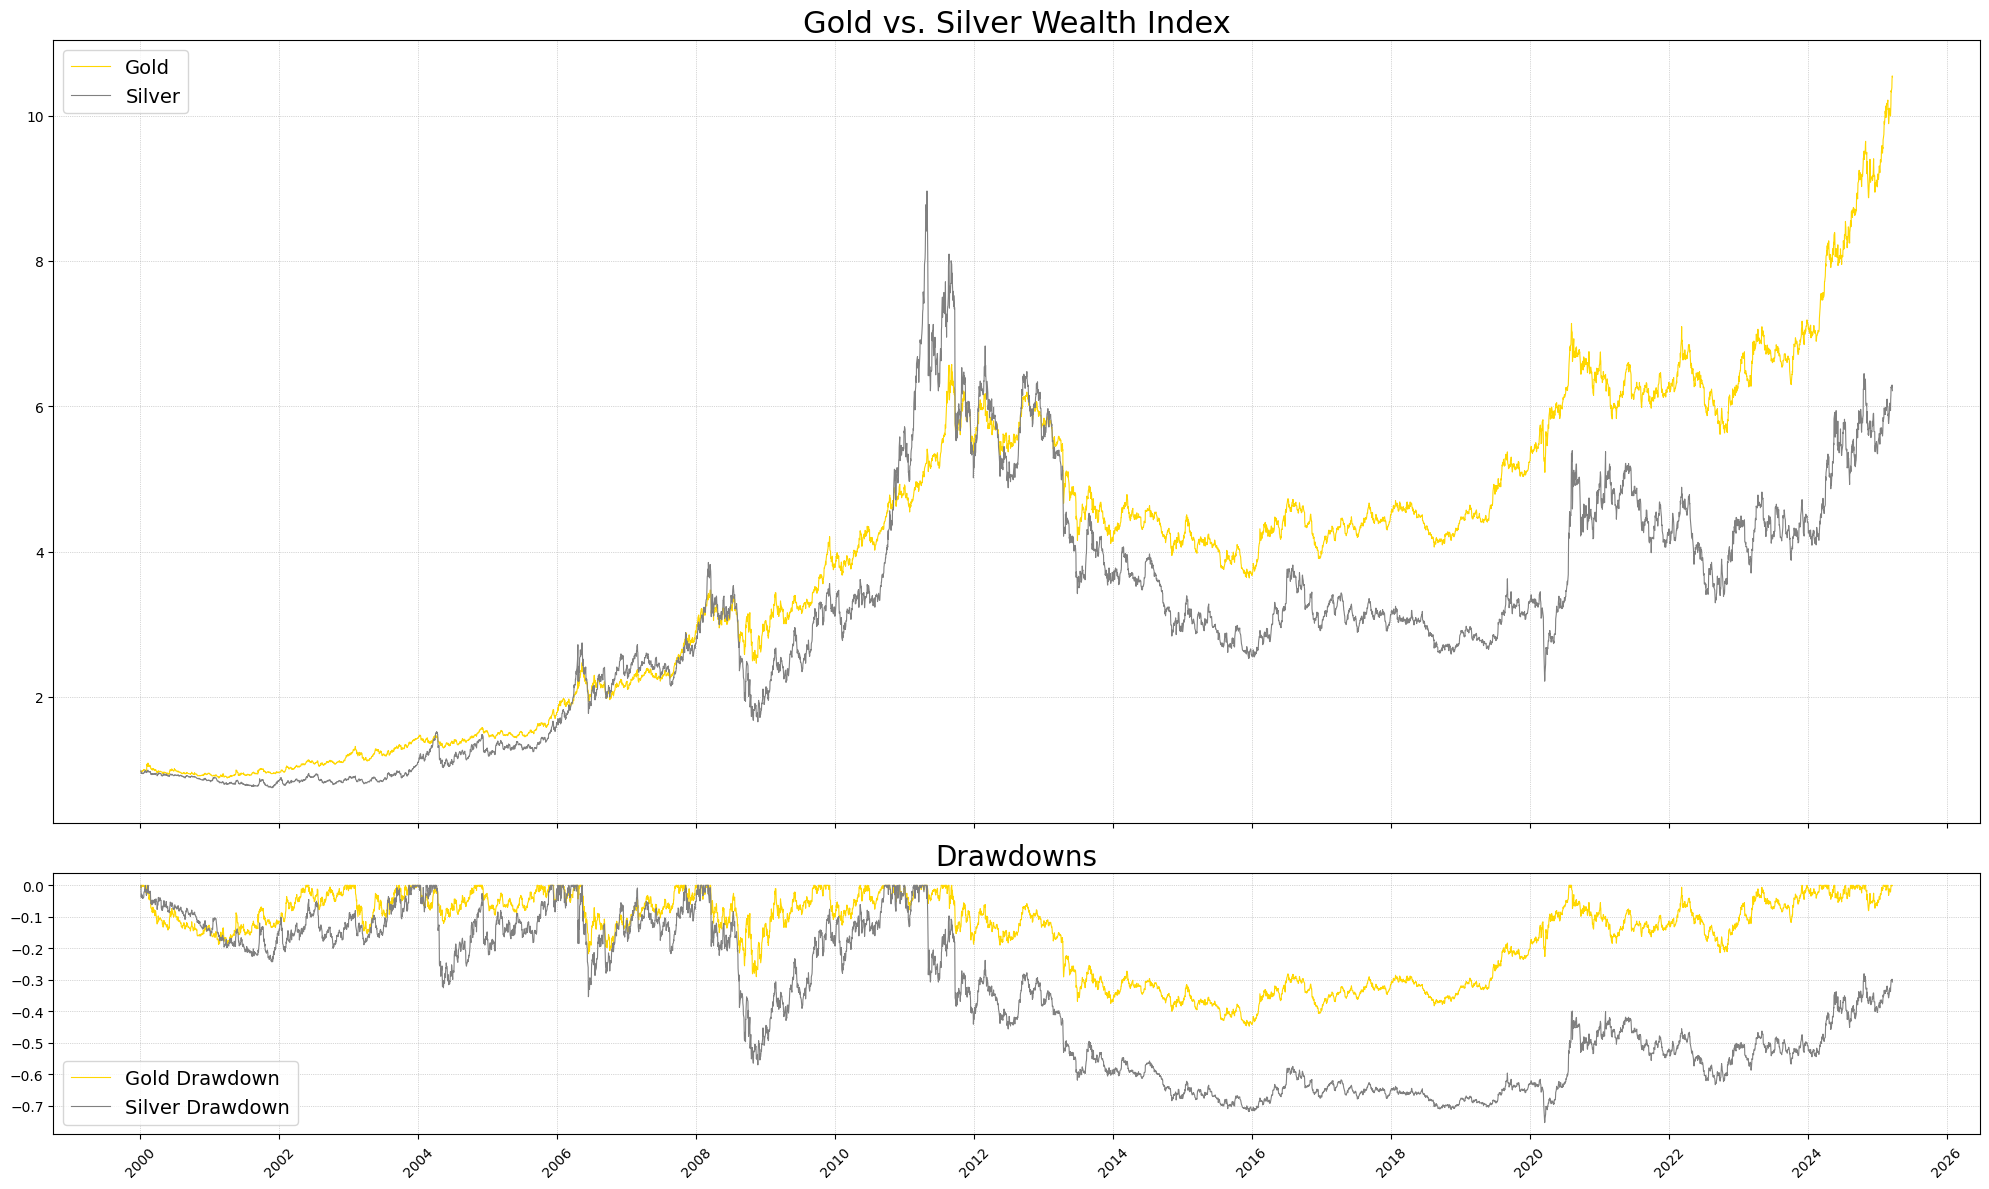

In [301]:
# Calculate Wealth Index
wealth_index = (1 + returns[["Gold", "Silver"]]).cumprod()

# Additionally add Drawdowns
wealth_index_max = wealth_index.cummax()
drawdown = (wealth_index - wealth_index_max) / wealth_index_max

# Set up subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot Wealth Index
ax1.plot(wealth_index.index, wealth_index['Gold'], color='gold', label='Gold', linewidth=0.8)
ax1.plot(wealth_index.index, wealth_index['Silver'], color='grey', label='Silver', linewidth=0.8)
ax1.set_title("Gold vs. Silver Wealth Index", fontsize=22)
ax1.legend(fontsize=14)
ax1.grid(True, linestyle=":", linewidth=0.5)

# Plot Drawdowns
ax2.plot(drawdown.index, drawdown['Gold'], color='gold', label='Gold Drawdown', linewidth=0.8)
ax2.plot(drawdown.index, drawdown['Silver'], color='grey', label='Silver Drawdown', linewidth=0.8)
ax2.set_title("Drawdowns", fontsize=20)
ax2.legend(fontsize=14)
ax2.grid(True, linestyle=":", linewidth=0.5)

# Format x-axis to present dataticks every two years
ax2.xaxis.set_major_locator(mdates.YearLocator(2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Question 2

Assuming that the US 10y yield represents the risk free rate, compute for gold and silver the sharpe ratio of a passive (long-only) investment for each of the available years and over all of the available history.

Sharpe Ratio Formula:

$$
\text{Sharpe Ratio} = \frac{E(R) - R_f}{\sqrt{\text{Var}(R - R_f)}}
$$

**Yearly**

In [302]:
# Calculate Annualized Sharpe Ratio for Gold
excess_returns_gold = returns["Gold"] - (prices["USD 10y yield"]/100)/252 # Double check calculations
mean_excess_return_gold = excess_returns_gold.resample("Y").mean()
std_dev_gold = excess_returns_gold.resample("Y").std()
sharpe_gold_annualized = mean_excess_return_gold / std_dev_gold * np.sqrt(252)

# Calculate Annualized Sharpe Ratio for Silver
excess_returns_silver = returns["Silver"] - (prices["USD 10y yield"]/100)/252
mean_excess_return_silver = excess_returns_silver.resample("Y").mean()
std_dev_silver = excess_returns_silver.resample("Y").std()
sharpe_silver_annualized = mean_excess_return_silver / std_dev_silver * np.sqrt(252)


In [303]:
# Compare results of annualized Sharpe Ratios of Gold and Silver
comparison_df = pd.DataFrame({
    'Gold Sharpe Ratio': sharpe_gold_annualized,
    'Silver Sharpe Ratio': sharpe_silver_annualized
})

comparison_df.round(4)

Gold Sharpe Ratio  Silver Sharpe Ratio
Dates                                             
2000-12-31            -0.7375              -1.6832
2001-12-31            -0.1155              -0.1771
2002-12-31             1.3551               0.0174
2003-12-31             0.8564               0.9441
2004-12-31             0.1369               0.4400
2005-12-31             0.9957               1.0752
2006-12-31             0.7660               0.9458
2007-12-31             1.3336               0.4601
2008-12-31             0.2117              -0.2837
2009-12-31             0.9940               1.2183
2010-12-31             1.4463               2.0182
2011-12-31             0.4296              -0.0629
2012-12-31             0.4026               0.3809
2013-12-31            -1.5178              -1.2505
2014-12-31            -0.2008              -0.9343
2015-12-31            -0.8684              -0.4873
2016-12-31             0.4471               0.6026
2017-12-31             1.0518               0.2995
2018-12-31            -0.4079              -0.6169
2019-12-31             1.3044               0.7163
2020-12-31             1.1862               1.0732
2021-12-31            -0.3107              -0.3828
2022-12-31            -0.1432               0.1358
2023-12-31             0.6732              -0.0650
2024-12-31             1.3443               0.6236
2025-12-31             5.2113               3.3926

**All time**

In [304]:
# All time Sharpe Ratio
all_time_sharp_gold = (excess_returns_gold.mean() /  excess_returns_gold.std()) * np.sqrt(252)
all_time_sharp_silver = (excess_returns_silver.mean() / excess_returns_silver.std()) * np.sqrt(252)

print(f"All time annualized Sharpe Ratio of Gold: {all_time_sharp_gold}")
print(f"All time annualized Sharp Ratio of Silver: {all_time_sharp_silver}")

All time annualized Sharpe Ratio of Gold: 0.4293053640391826
All time annualized Sharp Ratio of Silver: 0.27483822471564257


### Question 3

For each of the commodities, make sure the prices are in USD (if needs to be convert). Test if the prices are stationary (with the test of your choice).
Recapitulate your results in a nice table + barchart.
We have done something fundamentally wrong here - what is that? What would you propose to correct?



In [305]:
# Convert currency of Wheat MATIF from EUR into USD
prices["Wheat Matif USD"] = prices["Wheat Matif"] * prices["EURUSD"]

In [306]:
# Commodities column names
commodities = [
    # Precious Metals
    'Gold', 'Silver',

    # Base Metals 
    'Copper', 'Aluminium', 'Zinc',

    # Steel Products
    'Steel Hot Rolled Coil',

    # Agricultural – Grains
    'Wheat Chicago', 'Wheat Minneapolis', 'Wheat Matif USD', 'Corn', 'Soybean',

    # Agricultural – Livestock
    'Live Cattle', 'Lean Hogs',

    # Agricultural – Softs
    'Lumber', 'Coffee', 'Sugar', 'Cocoa',

    # Energy – Crude Oil
    'WTI', 'Brent',

    # Energy – Refined Products
    'RBOB', 'Heating Oil', 'IPE gasoil'
]

A time series is **weakly stationary** (also called **second-order stationary**) if and only if:


\begin{aligned}
E(X_t) &= \mu \quad \text{(the mean is constant over time)} \\
\text{Var}(X_t) &= \sigma^2 \quad \text{(the variance is constant over time)} \\
\text{Cov}(X_t, X_{t-k}) &= \gamma_k \quad \text{(the covariance depends only on the lag } k \text{, not on } t)
\end{aligned}

##### Math behind Agumented Dickey-Fuller Test

ADF is a unit root test for the stationarity of a time series sample. 

What is unit root? It's a characteristic of time-series that makes it non-stationaty, basically it means that single, random event can continue to infuence the process indefinitely by changing mean and variance of a time series over time.

$$\Delta y_{t}=\boldsymbol{\beta}^{\top} \boldsymbol{d}_{t}+\alpha y_{t-1}+\sum_{j=1}^{k} \alpha_{j} \Delta y_{t-j}+\varepsilon_{t}$$

|Term                         |Meaning                                     |
|---------------------------------------------|-------------------------------------------|
|$$\Delta y_{t}$$                             |    $$y_t - y_{t-1}$$     |
|$$d_t$$                                      |Deterministic  component                   | 
|$$\sum_{j=1}^{k} \alpha_{j} \Delta y_{t-j}$$ |Lagged differences accounting for serial correlation | 
|$$\varepsilon_{t}$$                    |Noise (Random Error Term)                | 

Null and alternative hypothesis are as follows:
$$
\begin{array}{ll}
H_{0}: \alpha=0 & (\phi=1)  & \text{(series has unit root => non-stationary)}\\
H_{1}: \alpha<0 & (\phi<1) & \text{(series does not have unit root => stationary)}
\end{array}
$$

T-Statistics of the test:

$$
\tau=\frac{\hat{\alpha}}{\text { s.e. }(\hat{\alpha})}
$$

There are few most common types of regression checking sationarity of  time series. We will focus on the regressionthat has non-zero mean and no trend (default `adfuller` function in statsmodels). Alternatives provided below:

 Regression Type                          | Deterministic Terms Included                                      |
|------------------------------------------|--------------------------------------------------------------------|
| Constant only                            | $$\beta_0 + \alpha y_{t-1}$$                                      |
| Constant + linear trend                  | $$\beta_0 + \beta_1 t + \alpha y_{t-1}$$                           |
| Constant + linear + quadratic trend      | $$\beta_0 + \beta_1 t + \beta_2 t^2 + \alpha y_{t-1}$$            |
| No constant, no trend                    | $$\alpha y_{t-1}$$                                                |



#### **Stationarity Tests**

In [307]:
# Agumented Dickey-Fuller Unit Test Table
test_stat = []
p_val = []

# Calculating 
for commodity in commodities:
    series = prices[commodity].dropna()
    result = adfuller(series)
    test_stat.append(result[0])
    p_val.append(result[1])

adf_results = pd.DataFrame([test_stat, p_val], index=["test_stat", "p_value"], columns=commodities)

# Show Results
adf_results.round(4).T.sort_values(by="p_value", ascending=False)


test_stat  p_value
Gold                      1.3497   0.9969
Coffee                    0.8063   0.9917
Live Cattle              -0.0528   0.9539
Silver                   -1.3208   0.6196
Copper                   -1.4393   0.5633
Cocoa                    -1.7204   0.4206
Zinc                     -2.0461   0.2667
Corn                     -2.1966   0.2075
Brent                    -2.2600   0.1852
Soybean                  -2.3024   0.1712
Heating Oil              -2.4574   0.1262
Aluminium                -2.5347   0.1073
Wheat Matif USD          -2.5447   0.1050
IPE gasoil               -2.6264   0.0877
Sugar                    -2.7343   0.0683
Wheat Minneapolis        -2.7687   0.0629
Wheat Chicago            -2.7884   0.0599
WTI                      -2.8150   0.0562
Lumber                   -3.0303   0.0322
Steel Hot Rolled Coil    -3.1471   0.0233
RBOB                     -3.5652   0.0065
Lean Hogs                -4.5664   0.0001

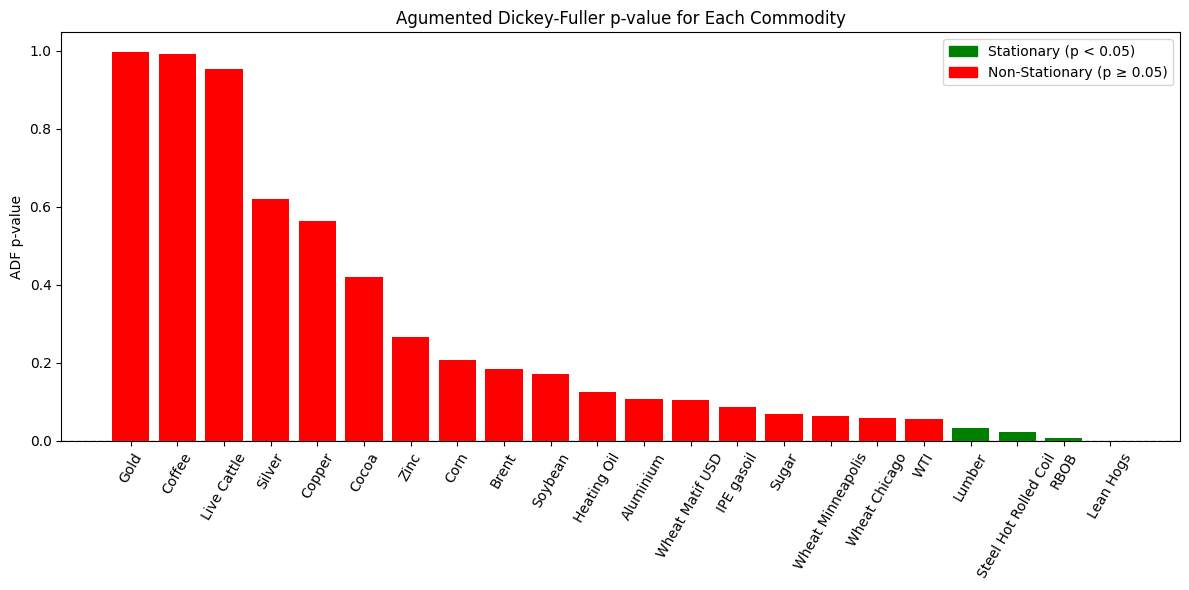

In [308]:
adf_results = adf_results.sort_values(by='p_value', axis=1, ascending=False)
colors = ['green' if p < 0.05 else 'red' for p in adf_results.loc['p_value']]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(adf_results.columns, adf_results.loc['p_value'], color=colors)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Agumented Dickey-Fuller p-value for Each Commodity')
plt.ylabel('ADF p-value')
plt.xticks(rotation=60)
plt.tight_layout()

# Add legend
red_patch = mpatches.Patch(color='red', label='Non-Stationary (p ≥ 0.05)')
green_patch = mpatches.Patch(color='green', label='Stationary (p < 0.05)')
plt.legend(handles=[green_patch, red_patch])

# Show the plot
plt.show()

One of the most commonly known stylized facts is that the prices are non-stationary. Commodities on `Lumber`, `Steel Hot Rolled Coil`, `RBOB`, and `Lean Hogs` seems to contradict that. Let's investigate further to discover reason behind the occurence.

In [309]:
# Checking for sequential duplicates values for the investigated variables
names_stationary_commodities = adf_results.loc[:, adf_results.loc['p_value'] < 0.05].columns.values

for name in names_stationary_commodities:
    # Drop NaN values to start from the first price avaliable for each commodity and check for consecutive duplicates
    series = prices[name].dropna()
    consecutive_duplicates = (series == series.shift(1))  # True if current value == previous value
    
    # Count sequential duplicates
    if True in consecutive_duplicates.value_counts():
        num_sequential_duplicates = consecutive_duplicates.value_counts()[True]
    else:
        num_sequential_duplicates = 0
    
    print(f"In {name} prices time series, there are {num_sequential_duplicates} sequential duplicated values.")
    print("")

In Lumber prices time series, there are 67 sequential duplicated values.

In Steel Hot Rolled Coil prices time series, there are 2208 sequential duplicated values.

In RBOB prices time series, there are 184 sequential duplicated values.

In Lean Hogs prices time series, there are 317 sequential duplicated values.



In [310]:
# Checking duplicated for the all variables
# Checking for sequential duplicates values for the investigated variables
names_stationary_commodities = adf_results.loc[:, adf_results.loc['p_value'] < 0.05].columns.values

for name in commodities:
    # Drop NaN values and check for consecutive duplicates
    series = prices[name].dropna()
    consecutive_duplicates = (series == series.shift(1))  # True if current value == previous value
    
    # Count sequential duplicates
    if True in consecutive_duplicates.value_counts():
        num_sequential_duplicates = consecutive_duplicates.value_counts()[True]
    else:
        num_sequential_duplicates = 0
    
    print(f"In {name} prices time series, there are {num_sequential_duplicates} sequential duplicated values.")
    print("")

In Gold prices time series, there are 56 sequential duplicated values.

In Silver prices time series, there are 126 sequential duplicated values.

In Copper prices time series, there are 301 sequential duplicated values.

In Aluminium prices time series, there are 307 sequential duplicated values.

In Zinc prices time series, there are 373 sequential duplicated values.

In Steel Hot Rolled Coil prices time series, there are 2208 sequential duplicated values.

In Wheat Chicago prices time series, there are 338 sequential duplicated values.

In Wheat Minneapolis prices time series, there are 542 sequential duplicated values.

In Wheat Matif USD prices time series, there are 5 sequential duplicated values.

In Corn prices time series, there are 411 sequential duplicated values.

In Soybean prices time series, there are 306 sequential duplicated values.

In Live Cattle prices time series, there are 354 sequential duplicated values.

In Lean Hogs prices time series, there are 317 sequential

In [311]:
# Example of sequential values
series = prices["Lumber"].dropna()  # Example for WTI
consecutive_duplicates = (series == series.shift(1))
series[consecutive_duplicates].iloc[:3]

Dates
2022-08-17    690.0
2022-08-25    608.0
2022-08-26    608.0
Name: Lumber, dtype: float64

Data contains many sequential duplicates for each commodity (not only commodities under the investigation  related to stationarity) which can skew results and make prices to appear to be stationary.

**Reasons:** \
1/ Dates include market holdays where market were closed and no trades occur (for example 17 January and  20 February in 2000 were Martin Luter King's Day and Washington birthday) \
2/ For contracts such as Lumber have little past data and intitailly contracts were not traded often which impacted contracts liquidity

**Proposed solution:**\
One could exclude market holidays when trading did not occur and run stationarity test again

### Question 4

For each commodity, compute its 21 day - rolling realized volatility. Display in scatterplots realized vols vs prices. Comment.  


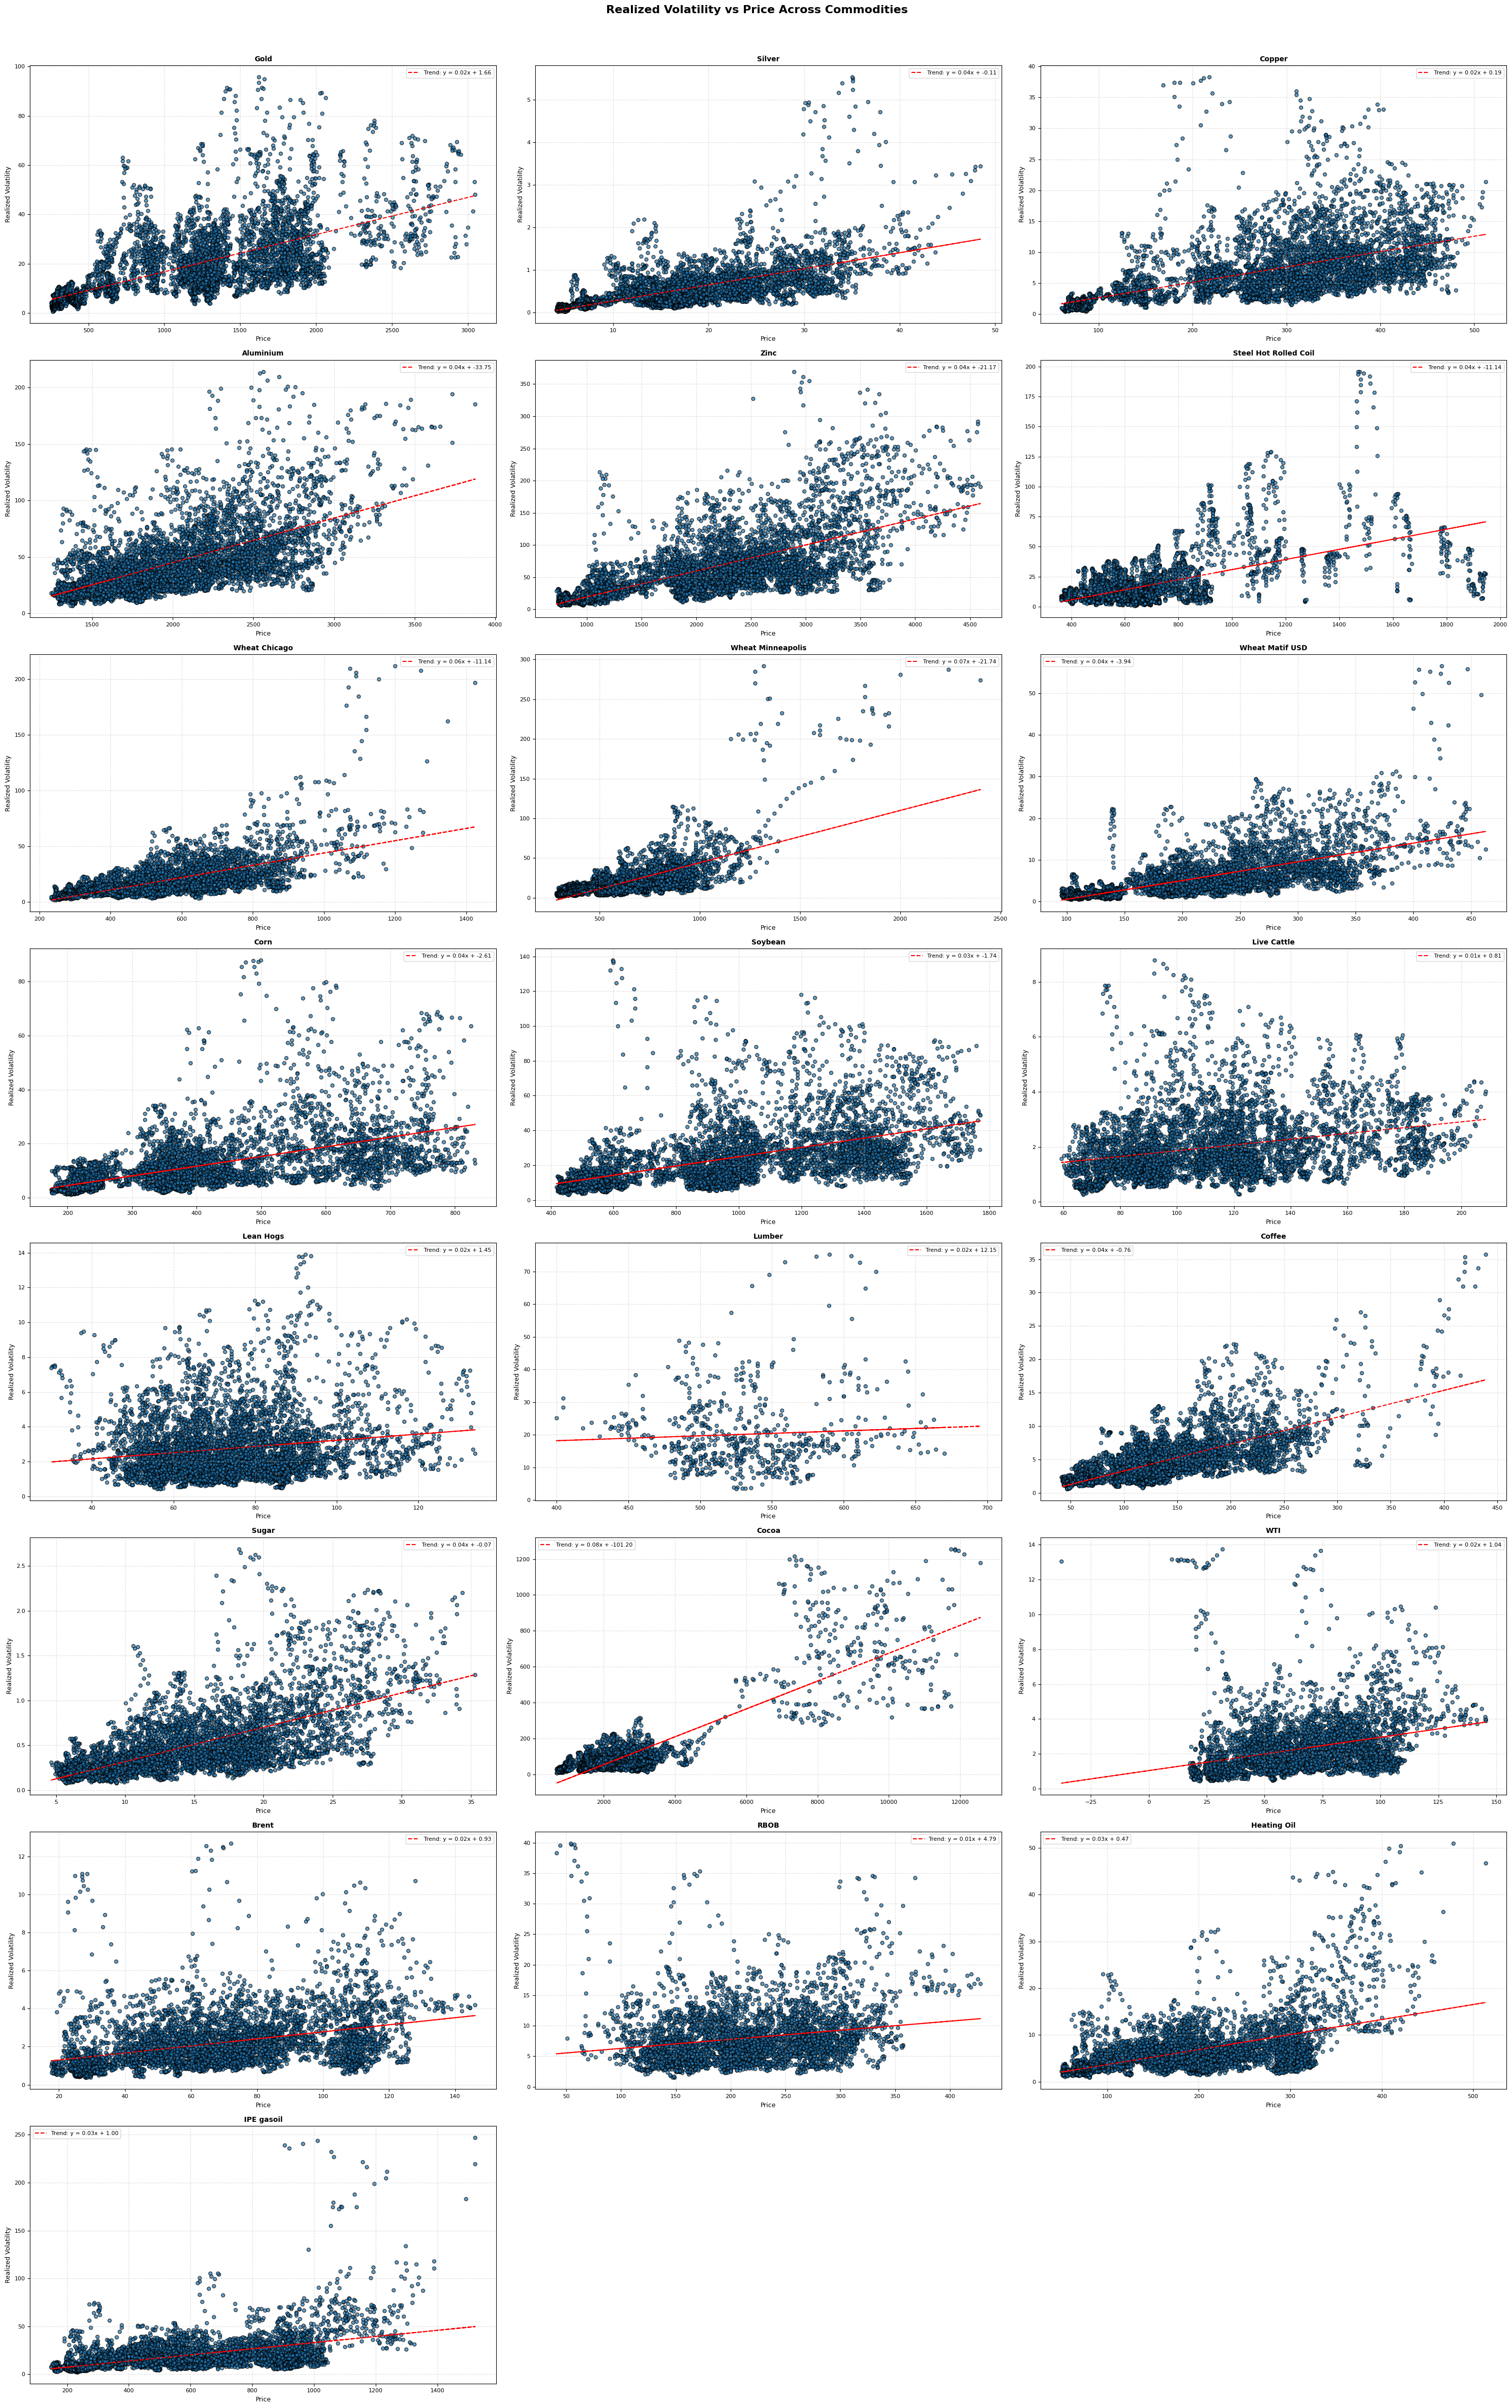

In [312]:
# Set up the grid: 6 rows x 4 columns (fits up to 24 plots)
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(30, 50))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for idx, commodity in enumerate(commodities):
    ax = axes[idx]
    x = prices[commodity].dropna()  # Price
    y = x.rolling(21).std(ddof=0)   # Realized volatility (21-day rolling std)
    
    # Scatterplot
    ax.scatter(x, y, alpha=0.7, edgecolors='k', s=25)
    
    # Add linear trend line (y = mx + c)
    mask = ~np.isnan(x) & ~np.isnan(y)  # Drop NaN pairs
    if sum(mask) > 1:  # Ensure enough data points
        m, c = np.polyfit(x[mask], y[mask], deg=1)  # Linear regression
        ax.plot(x, m * x + c, color='red', linestyle='--', linewidth=1.5, 
                label=f'Trend: y = {m:.2f}x + {c:.2f}')
        ax.legend(fontsize=8)
    
    # Titles and axis labels
    ax.set_title(commodity, fontsize=10, fontweight='bold')
    ax.set_xlabel('Price', fontsize=9)
    ax.set_ylabel('Realized Volatility', fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots (if any)
for j in range(len(commodities), len(axes)):
    fig.delaxes(axes[j])

# Overall title
plt.suptitle('Realized Volatility vs Price Across Commodities', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to fit suptitle
plt.show()

**Insights:**\
1/ Prices identified as outliers typically exhibit elevated rolling volatility, suggesting that extreme price movements are accompanied by heightened instability. \
2/ Volatility generally increases with price levels, indicating a potential link between higher valuations and greater market uncertainty. \
3/ Gold and silver demonstrate historically low realized volatility, consistent with their role as perceived safe-haven investments during market turbulence \
4/ The methodology used to construct the time series—particularly the treatment of carry-forward prices—may artificially suppress volatility, as noted in prior exersise.

### Question 5
Remove TC2 freight from this analysis.
Compute (on the returns) the covariance matrix of those commodities. Display in bar charts the eigenvalues (how the variance can be attributed), and the eigenvectors.
Do you have interpretations for those eigenvectors (at least the most important ones) ?

In [313]:
# Analyze starting dates for different commodities
start_dates = []

for commodity in commodities:
    non_na = prices[commodity].dropna()
    if not non_na.empty:
        start_dates.append({
            'Commodity': commodity,
            'Start Date': non_na.index[0].date()
        })

start_dates_df = pd.DataFrame(start_dates)
start_dates_df = start_dates_df.sort_values(by='Start Date', ascending=False).reset_index(drop=True)

# Display the result
print(start_dates_df)

                Commodity  Start Date
0                  Lumber  2022-08-05
1   Steel Hot Rolled Coil  2008-10-20
2                    RBOB  2005-10-03
3                    Gold  2000-01-03
4               Lean Hogs  2000-01-03
5             Heating Oil  2000-01-03
6                   Brent  2000-01-03
7                     WTI  2000-01-03
8                   Cocoa  2000-01-03
9                   Sugar  2000-01-03
10                 Coffee  2000-01-03
11            Live Cattle  2000-01-03
12                 Silver  2000-01-03
13                Soybean  2000-01-03
14                   Corn  2000-01-03
15        Wheat Matif USD  2000-01-03
16      Wheat Minneapolis  2000-01-03
17          Wheat Chicago  2000-01-03
18                   Zinc  2000-01-03
19              Aluminium  2000-01-03
20                 Copper  2000-01-03
21             IPE gasoil  2000-01-03


In [314]:
#code
# We have excluded Lumber as commodity has less than 3 years of data avaliable and left Matif Wheat in USD (I need to think about it)
commodities_no_lumber = [c for c in commodities if c != 'Lumber']

# Let's assume that we are computing covariance matrix on all comodities in the dataset
return_commodities = prices[commodities_no_lumber].pct_change()

# Keep common dates only
return_commodities.dropna(inplace=True)

# Compute Covariance Matrix
cov_matrix = return_commodities.cov()

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) 
eigenvalues = eigenvalues[::-1]  # descending order
eigenvectors = eigenvectors[:, ::-1] 

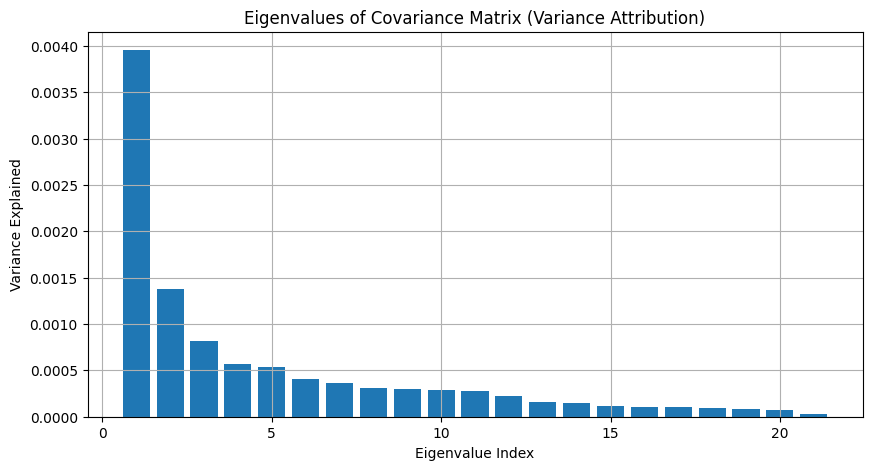

In [315]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Variance Explained')
plt.title('Eigenvalues of Covariance Matrix (Variance Attribution)')
plt.grid(True)
plt.show()

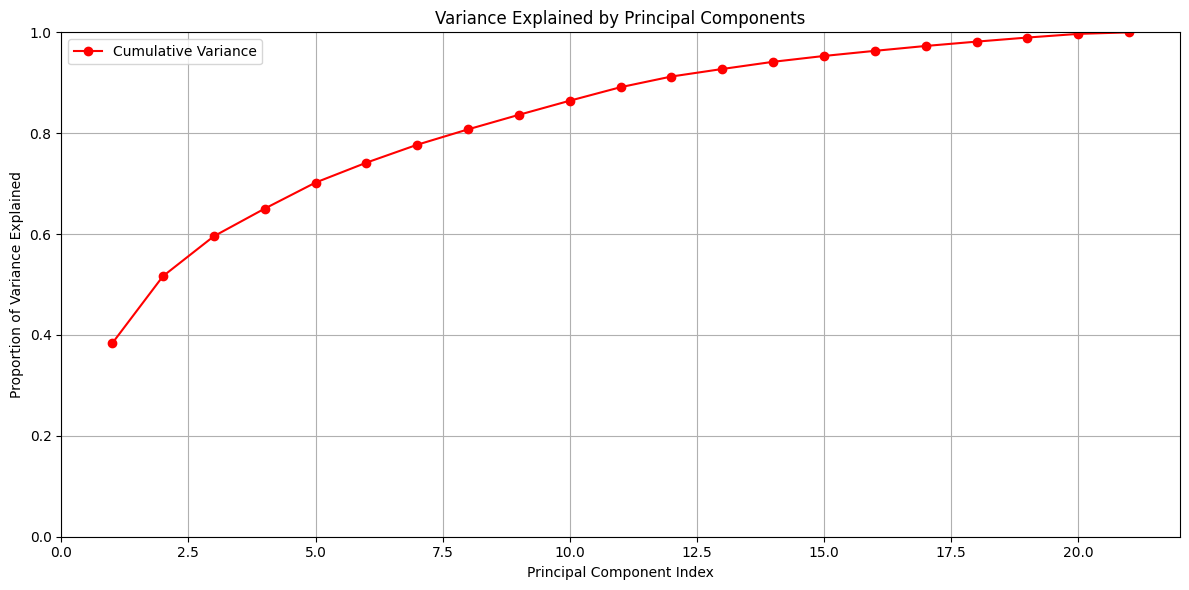

In [316]:
# Compute cumulative variance explained
variance_explained = eigenvalues / eigenvalues.sum()
cumulative_variance = np.cumsum(variance_explained)

# Plot bar chart of individual eigenvalues (variance explained by each PC)
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(eigenvalues)+1), cumulative_variance, marker='o', color='red', label='Cumulative Variance')

# Labels and title
plt.xlabel('Principal Component Index')
plt.ylabel('Proportion of Variance Explained')
plt.ylim(0,1)
plt.title('Variance Explained by Principal Components')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

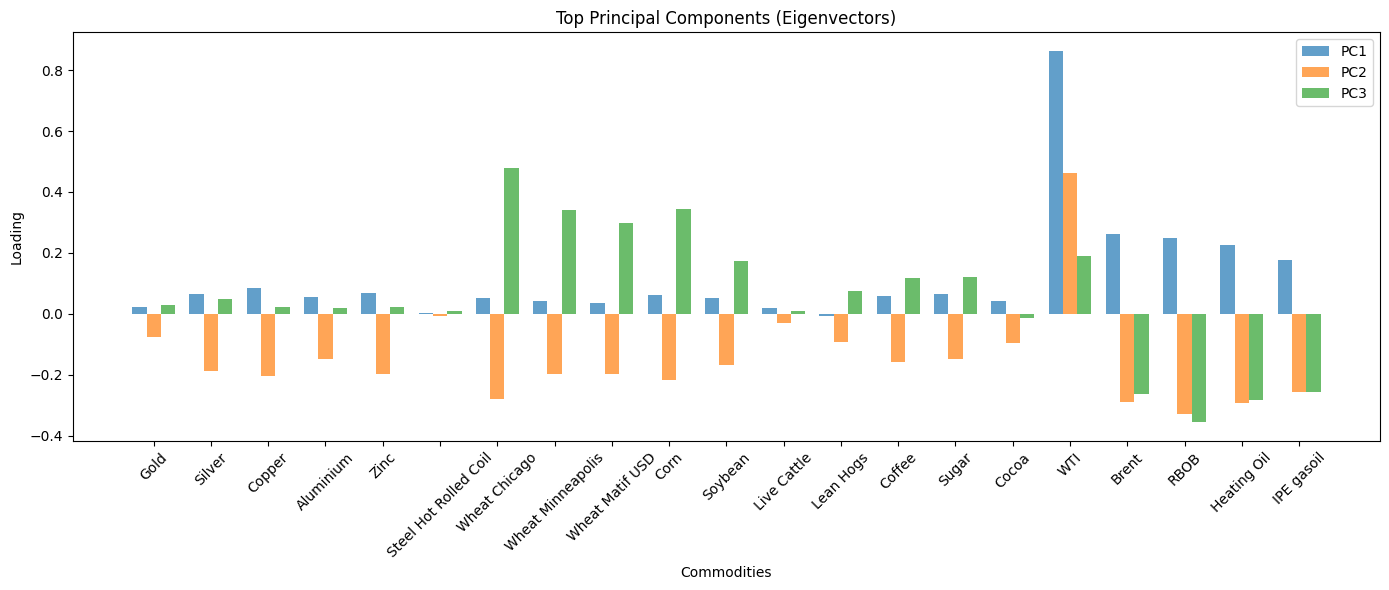

In [317]:
n_pcs_to_plot = 3
n_commodities = len(commodities_no_lumber)
bar_width = 0.25
x = np.arange(n_commodities)

# Plot
plt.figure(figsize=(14, 6))
for i in range(n_pcs_to_plot):
    plt.bar(x + i * bar_width, eigenvectors[:, i], 
            width=bar_width, label=f'PC{i+1}', alpha=0.7)

# Axes and labels
plt.xlabel('Commodities')
plt.ylabel('Loading')
plt.title('Top Principal Components (Eigenvectors)')
plt.xticks(x + bar_width, commodities_no_lumber, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [318]:
# Create a DataFrame for better interpretability
eigenvectors_df = pd.DataFrame(
    eigenvectors,
    index=return_commodities.columns,
    columns=[f'PC{i+1}' for i in range(len(eigenvectors))]
)

# Display top eigenvectors
eigenvectors_df.iloc[:, :3]  # First 3 principal components

PC1       PC2       PC3
Gold                   0.022506 -0.075893  0.029444
Silver                 0.064584 -0.189165  0.049387
Copper                 0.083801 -0.202745  0.020777
Aluminium              0.055291 -0.148512  0.019965
Zinc                   0.068528 -0.198960  0.022265
Steel Hot Rolled Coil  0.003709 -0.007045  0.008102
Wheat Chicago          0.052963 -0.278644  0.479708
Wheat Minneapolis      0.042226 -0.199106  0.339715
Wheat Matif USD        0.037088 -0.198131  0.298490
Corn                   0.061124 -0.217547  0.344848
Soybean                0.050868 -0.168462  0.174615
Live Cattle            0.018633 -0.029384  0.007931
Lean Hogs             -0.005889 -0.091972  0.074279
Coffee                 0.057386 -0.159105  0.116346
Sugar                  0.064671 -0.146807  0.120556
Cocoa                  0.041706 -0.095491 -0.012217
WTI                    0.863214  0.461196  0.190251
Brent                  0.263268 -0.291189 -0.262338
RBOB                   0.250057 -0.328915 -0.356462
Heating Oil            0.224389 -0.293448 -0.283341
IPE gasoil             0.176980 -0.257519 -0.255159

1/ The first eigenvector—associated with the highest eigenvalue—captures the broadest variance in the data, primarily reflecting global energy price movements. This component is strongly influenced by fluctuations in key benchmarks such as WTI crude, Brent crude, heating oil, and gasoil.

2/ The second eigenvector explains variability in precious and industrial metals, likely driven by their sensitivity to inflationary pressures. We suspect that this factor may represent shifts in demand or macroeconomic conditions affecting these commodities.

3/ The third eigenvector isolates variations in grains and agricultural commodities, which we can interpret as a proxy for harvest cycles, weather-related disruptions, and other seasonal or supply-driven patterns inherent to this sector.

# Part II: Elasticities

### Question 6
- Load the file demand.csv (demands as per USDA are in metric tons. US population in thousands. US GDP in USD Billions)
- resample the prices to have yearly averages for chicago wheat and soybeans.
- merge the dataframes

As we described in class, run an OLS to estimate of the price elasticity of wheat demand for the US



In [319]:
# Loading demand.csv
demand = pd.read_csv('./demand.csv')
demand['Dates'] = pd.to_datetime(demand['Dates'])
print(demand.head())

       Dates  Wheat_Argentina  Wheat_Brazil  Wheat_Canada  Wheat_China  \
0 1990-12-31             4540          7400          6537       102367   
1 1991-12-31             4530          7844          6576       102598   
2 1992-12-31             4578          7175          7779       105429   
3 1993-12-31             4265          7839          8148       104281   
4 1994-12-31             4298          8075          9352       105343   

   Wheat_Serbia and Montenegro  Wheat_Egypt  Wheat_EU-25  Wheat_Indonesia  \
0                          NaN        10441          NaN             1892   
1                       1786.0        10266          NaN             1967   
2                       1786.0        10289          NaN             2537   
3                       1786.0        10421          NaN             2715   
4                       2979.0        10514          NaN             3012   

   Wheat_India  ...  Soybean_Philippines  Soybean_Romania  Soybean_Russia  \
0        53201 

In [320]:
# Sampling from prices: 'Wheat Chicago', 'Soybean'
prices_sample = prices[['Wheat Chicago', 'Soybean']].dropna()

# For each price, we add 'Price - ' to the column name
prices_sample.columns = ['Price - ' + col for col in prices_sample.columns]

# For each year, calculate the average price and create a new df with one observation per year
prices_sample_yearly = prices_sample.resample('Y').mean()
prices_sample_yearly.index = pd.to_datetime(prices_sample_yearly.index)
print(prices_sample_yearly.head())


            Price - Wheat Chicago  Price - Soybean
Dates                                             
2000-12-31             257.651923       498.141346
2001-12-31             272.150383       459.502874
2002-12-31             323.716475       514.404215
2003-12-31             334.716475       635.088123
2004-12-31             345.854962       752.467557


In [321]:
# Merging demand and prices using the index
demand_prices = pd.merge(demand, prices_sample_yearly, left_on='Dates', right_index=True)
demand_prices.set_index('Dates', inplace=True)
print(demand_prices.head())

            Wheat_Argentina  Wheat_Brazil  Wheat_Canada  Wheat_China  \
Dates                                                                  
2000-12-31             5050          9547          8092       109340   
2001-12-31             5100          9600          7060       110278   
2002-12-31             5150          9700          7808       108742   
2003-12-31             5300          9850          7735       105200   
2004-12-31             5350          9900          7179       104500   

            Wheat_Serbia and Montenegro  Wheat_Egypt  Wheat_EU-25  \
Dates                                                               
2000-12-31                       2057.0        13300     113971.0   
2001-12-31                       1804.0        12800     119273.0   
2002-12-31                       2050.0        12900     119115.0   
2003-12-31                       1900.0        13300     125704.0   
2004-12-31                       1800.0        13600     115752.0   

           

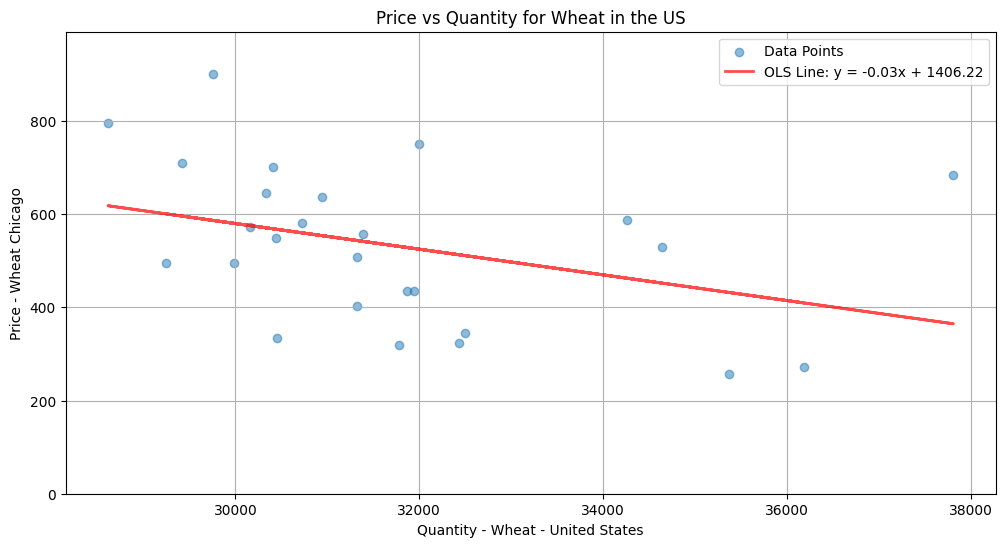

In [322]:
# NAIVE APPROACH
# Graphing price vs quantity for wheat and soybean in the US
# First graph: y axis - "Price - Wheat Chicago", x axis - Quantity - "Wheat -United States"
plt.figure(figsize=(12, 6))
plt.scatter(demand_prices['Wheat_United States'], demand_prices['Price - Wheat Chicago'], alpha=0.5, label='Data Points')

# Fit OLS line
x = demand_prices['Wheat_United States']
y = demand_prices['Price - Wheat Chicago']
mask = ~np.isnan(x) & ~np.isnan(y)  # Remove NaN values
m, c = np.polyfit(x[mask], y[mask], 1)  # Linear regression
plt.plot(x, m * x + c, color='red', linestyle='-', linewidth=2, label=f'OLS Line: y = {m:.2f}x + {c:.2f}', alpha=0.7)

plt.title('Price vs Quantity for Wheat in the US')
plt.xlabel('Quantity - Wheat - United States')
plt.ylabel('Price - Wheat Chicago')
plt.legend()
plt.ylim(0, demand_prices['Price - Wheat Chicago'].max() * 1.1)
plt.grid(True)
plt.show()

In [323]:
# INTELLIGENT APPROACH
# In a new dataframe, for wheat and soybean we calculade dD/D and dP/P
elasticity_df = pd.DataFrame()

# Changes in demand
elasticity_df['dD/D Wheat'] = demand_prices['Wheat_United States'].pct_change()
elasticity_df['dD/D Soybean'] = demand_prices['Soybean_United States'].pct_change()

# Changes in prices
elasticity_df['dP/P Wheat'] = demand_prices['Price - Wheat Chicago'].pct_change()
elasticity_df['dP/P Soybean'] = demand_prices['Price - Soybean'].pct_change()

elasticity_df = elasticity_df.dropna()  # Drop NaN values
print(elasticity_df)

            dD/D Wheat  dD/D Soybean  dP/P Wheat  dP/P Soybean
Dates                                                         
2001-12-31    0.022927      0.038301    0.056271     -0.077565
2002-12-31   -0.103637      0.033819    0.189476      0.119480
2003-12-31   -0.061232     -0.065720    0.033980      0.234609
2004-12-31    0.067328     -0.061527    0.033277      0.184824
2005-12-31   -0.022001      0.152623   -0.078037     -0.191602
2006-12-31   -0.014568      0.026144    0.262279     -0.027019
2007-12-31   -0.012133      0.013687    0.581832      0.457880
2008-12-31   -0.075178     -0.034522    0.250500      0.428133
2009-12-31    0.210596     -0.068085   -0.334571     -0.163029
2010-12-31   -0.112933      0.054290    0.097511      0.017351
2011-12-31   -0.042437     -0.046783    0.219164      0.255759
2012-12-31    0.087310      0.008997    0.058393      0.110706
2013-12-31    0.181821     -0.004837   -0.087904     -0.038508
2014-12-31   -0.093891      0.030752   -0.140336     -0

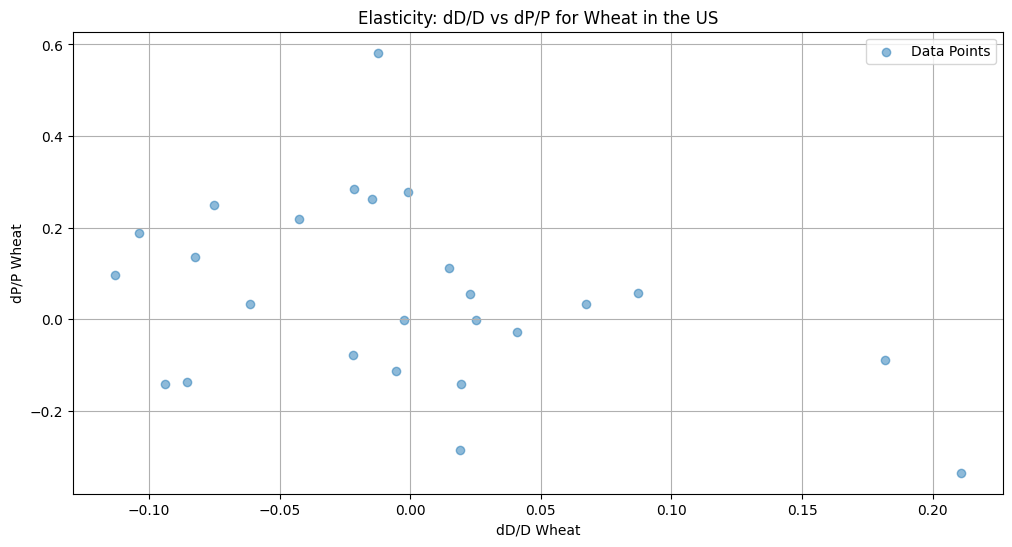

In [324]:
# Graphing: dD/D vs dP/P for wheat in the US
plt.figure(figsize=(12, 6))
plt.scatter(elasticity_df['dD/D Wheat'], elasticity_df['dP/P Wheat'], alpha=0.5, label='Data Points')
plt.title('Elasticity: dD/D vs dP/P for Wheat in the US')
plt.xlabel('dD/D Wheat')
plt.ylabel('dP/P Wheat')
plt.legend()
plt.grid(True)
plt.show()


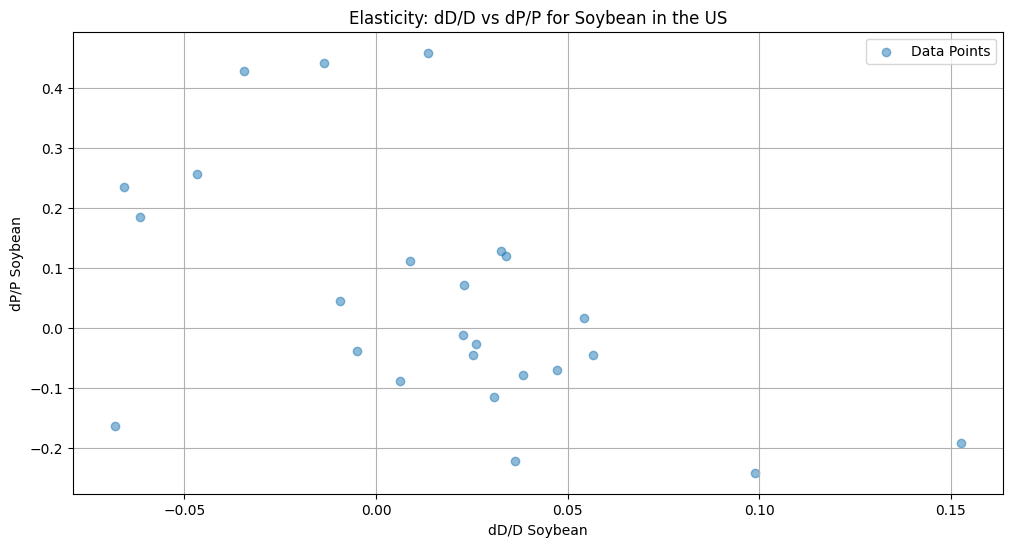

In [325]:
# Graphing: dD/D vs dP/P for soybean in the US
plt.figure(figsize=(12, 6))
plt.scatter(elasticity_df['dD/D Soybean'], elasticity_df['dP/P Soybean'], alpha=0.5, label='Data Points')
plt.title('Elasticity: dD/D vs dP/P for Soybean in the US')
plt.xlabel('dD/D Soybean')
plt.ylabel('dP/P Soybean')
plt.legend()
plt.grid(True)
plt.show()

In [326]:
# # Estimating price elasticity of wheat (without cross-price elasticity)
X = elasticity_df['dD/D Wheat']
y = elasticity_df['dP/P Wheat']
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             dP/P Wheat   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.803
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0634
Time:                        19:36:13   Log-Likelihood:                 6.9637
No. Observations:                  25   AIC:                            -9.927
Df Residuals:                      23   BIC:                            -7.490
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0481      0.038      1.259      0.2

In [327]:
# # Estimating price elasticity of soybean (without cross-price elasticity)
X = elasticity_df['dD/D Soybean']
y = elasticity_df['dP/P Soybean']
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           dP/P Soybean   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8.806
Date:                Wed, 23 Apr 2025   Prob (F-statistic):            0.00690
Time:                        19:36:13   Log-Likelihood:                 9.4920
No. Observations:                  25   AIC:                            -14.98
Df Residuals:                      23   BIC:                            -12.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0802      0.036      2.206   

### Question 7

1. Estimate the price elasticity of soybean demand for the US
Run bivariate OLS to estimate cross (price-) eleasticities. 
2. Are wheat and soybean substitutes or complements?
3. Have your estimates of simple elasticites materially changed vs. univariate regressions of previous questions?




In [328]:
# Estimating price elasticity of soybean
# REGRESSION: dD/D Soybean = constant + price_elasticity * dP/P Soybean + cross_price_elasticity * dP/P Wheat + error
# Fit OLS regression
X = elasticity_df[['dP/P Soybean', 'dP/P Wheat']]
X = sm.add_constant(X)  # Add constant term
y = elasticity_df['dD/D Soybean']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           dD/D Soybean   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     15.21
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           7.13e-05
Time:                        19:36:13   Log-Likelihood:                 50.785
No. Observations:                  25   AIC:                            -95.57
Df Residuals:                      22   BIC:                            -91.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0193      0.007      2.766   

In [329]:
# Extracting coefficients
price_elasticity = model.params['dP/P Soybean']
cross_price_elasticity = model.params['dP/P Wheat']
print(f"Price Elasticity of Soybean: {price_elasticity}")
print(f"Cross Price Elasticity of Soybean with respect to Wheat: {cross_price_elasticity}")
# TODO: COMMENT - SAY: THEY ARE SUBSTITUTES, AND YES, WHEN CONSIDERING CROSS-PRICE ELASTICITY, THE NORMAL PRICE ELASTICITY IS STRONGER

Price Elasticity of Soybean: -0.29559631501727457
Cross Price Elasticity of Soybean with respect to Wheat: 0.2108004925408472


### Question 8
For each of the selected countries, compute (using bivariate regressions):
1. Elasticities of demand for wheat and soybean
2. Cross elasticities

Find a was to visualize those results in a synthetic way.
Interpret. Do you think our results are strong?




In [330]:
# Function that takes quantities of two commodities, prices of two commodities
# Calculates dD/D and dP/P for each commodity
# Runs two bivariate regressions, and stores the following coefficient
# 1. Price elasticity of commodity 1, 2. Cross-price elasticity of commodity 1 with respect to commodity 2
# 3. Price elasticity of commodity 2, 4. Cross-price elasticity of commodity 2 with respect to commodity 1
def calculate_elasticities(quantities_1, quantities_2, prices_1, prices_2, name_1, name_2):
    # Create a new DataFrame for elasticity calculations
    elasticity_df = pd.DataFrame()

    # Changes in demand
    elasticity_df['dD/D 1'] = quantities_1.pct_change()
    elasticity_df['dD/D 2'] = quantities_2.pct_change()
    
    # Changes in prices
    elasticity_df['dP/P 1'] = prices_1.pct_change()
    elasticity_df['dP/P 2'] = prices_2.pct_change()
    
    # Drop NaN values
    elasticity_df = elasticity_df.dropna()
    
    # Fit OLS regression for commodity 1
    X1 = elasticity_df[['dP/P 1', 'dP/P 2']]
    X1 = sm.add_constant(X1)  # Add constant term
    y1 = elasticity_df['dD/D 1']
    model1 = sm.OLS(y1, X1).fit()
    
    # Fit OLS regression for commodity 2
    X2 = elasticity_df[['dP/P 1', 'dP/P 2']]
    X2 = sm.add_constant(X2)  # Add constant term
    y2 = elasticity_df['dD/D 2']
    model2 = sm.OLS(y2, X2).fit()
    
    # Extract coefficients
    price_elasticity_1 = model1.params['dP/P 1']
    cross_price_elasticity_1 = model1.params['dP/P 2']
    price_elasticity_2 = model2.params['dP/P 2']
    cross_price_elasticity_2 = model2.params['dP/P 1']
    
    # Creating a dataframe to store the results
    # 4 columns: Price Elasticity of commodity 1, Cross-price elasticity of commodity 1 with respect to commodity 2
    # Price Elasticity of commodity 2, Cross-price elasticity of commodity 2 with respect to commodity 1
    results_df = pd.DataFrame({
        'Price Elasticity - Wheat': [price_elasticity_1],
        'Cross Price Elasticity - Wheat/Soybean': [cross_price_elasticity_1],
        'Price Elasticity - Soybean': [price_elasticity_2],
        'Cross Price Elasticity - Soybean/Wheat': [cross_price_elasticity_2]
    })
    
    return results_df
    

In [331]:
# Testing the function with Wheat and Soybean in the US
print(calculate_elasticities(quantities_1=demand_prices['Wheat_United States'],
                       quantities_2=demand_prices['Soybean_United States'],
                       prices_1=demand_prices['Price - Wheat Chicago'],
                       prices_2=demand_prices['Price - Soybean'],
                       name_1='Wheat',
                       name_2='Soybean'))

   Price Elasticity - Wheat  Cross Price Elasticity - Wheat/Soybean  \
0                 -0.237524                                0.118392   

   Price Elasticity - Soybean  Cross Price Elasticity - Soybean/Wheat  
0                   -0.295596                                  0.2108  


In [332]:
# From demand.csv we extract the column names
countries = demand.columns[1:]  # Exclude the 'Dates' column

# For each item we check if it starts with 'Wheat_' or 'Soybean_', if it does we keep it in the list, but remove the prefix
countries_wheat_soybean = [country.split('_')[1] for country in countries if country.startswith('Wheat_') or country.startswith('Soybean_')]
countries_wheat_soybean = list(set(countries_wheat_soybean))
countries_wheat_soybean.sort()
# Dropping 'Romania' because there is not enough data
countries_wheat_soybean.remove('Romania')
print(countries_wheat_soybean)

['Argentina', 'Brazil', 'Canada', 'China', 'EU-25', 'Egypt', 'India', 'Indonesia', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Philippines', 'Russia', 'Serbia and Montenegro', 'South Africa', 'South Korea', 'Turkey', 'Ukraine', 'United States', 'World']


In [333]:
# We will be running the function for each country
# Wheat and soybean prices are always the same, so we will be changing the quantities and appending the results to the dataframe
# And adding the country as the index
elasticities_df = pd.DataFrame()
for country in countries_wheat_soybean:
    # Extracting quantities and prices for wheat and soybean
    quantities_wheat = demand_prices[f'Wheat_{country}']
    quantities_soybean = demand_prices[f'Soybean_{country}']
    prices_wheat = demand_prices['Price - Wheat Chicago']
    prices_soybean = demand_prices['Price - Soybean']
    
    # Calculate elasticities
    try:
        result = calculate_elasticities(quantities_1=quantities_wheat,
                                        quantities_2=quantities_soybean,
                                        prices_1=prices_wheat,
                                        prices_2=prices_soybean,
                                        name_1='Wheat',
                                        name_2='Soybean')
    except:
        result = pd.DataFrame({
            'Price Elasticity - Wheat': [np.nan],
            'Cross Price Elasticity - Wheat/Soybean': [np.nan],
            'Price Elasticity - Soybean': [np.nan],
            'Cross Price Elasticity - Soybean/Wheat': [np.nan]
        })
    
    # Append the result to the dataframe
    elasticities_df = pd.concat([elasticities_df, result], axis=0)
    
# Set the index to the country names
elasticities_df.index = countries_wheat_soybean

print(elasticities_df)
    

                       Price Elasticity - Wheat  \
Argentina                              0.108292   
Brazil                                -0.049491   
Canada                                 0.197247   
China                                 -0.025015   
EU-25                                  0.019256   
Egypt                                 -0.000628   
India                                  0.024402   
Indonesia                              0.052876   
Iran                                   0.086531   
Japan                                  0.000002   
Mexico                                -0.005238   
Morocco                                0.035412   
Nigeria                                0.429743   
Philippines                           -0.086821   
Russia                                 0.008016   
Serbia and Montenegro                 -0.157688   
South Africa                          -0.005301   
South Korea                            0.242493   
Turkey                         

### Question 9
For the US you have at your disposale the population and GDP. Compute the income elasticity of demand for wheat and soybean:
1. First using GDP as an aggregate
2. Then breaking $d ln(GDP) = d ln(GDP/population)+d ln( population)$


What type of good is wheat ? why ? And soybean ?




In [346]:
# Calculating the income elasticity for wheat and soybean for the US
# dD/D = constant + income_elasticity * dI/I + error,
# where at first I is US_GDP, which is part of demand.csv

# First, to elasticity_df we add the GDP growth rate
elasticity_df['dI/I'] = demand_prices['US_GDP'].pct_change()
elasticity_df = elasticity_df.dropna()

In [347]:
# Fit OLS regression for wheat
X_wheat = elasticity_df['dI/I']
y_wheat = elasticity_df['dD/D Wheat']
X_wheat = sm.add_constant(X_wheat)  # Add constant term
model_wheat = sm.OLS(y_wheat, X_wheat).fit()
print(model_wheat.summary())

                            OLS Regression Results                            
Dep. Variable:             dD/D Wheat   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.643
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.213
Time:                        19:43:42   Log-Likelihood:                 29.154
No. Observations:                  25   AIC:                            -54.31
Df Residuals:                      23   BIC:                            -51.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0268      0.027      0.981      0.3

In [348]:
# Fit OLS regression for soybean
X_soybean = elasticity_df['dI/I']
y_soybean = elasticity_df['dD/D Soybean']
X_soybean = sm.add_constant(X_soybean)  # Add constant term
model_soybean = sm.OLS(y_soybean, X_soybean).fit()
print(model_soybean.summary())

                            OLS Regression Results                            
Dep. Variable:           dD/D Soybean   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.3352
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.568
Time:                        19:44:47   Log-Likelihood:                 40.114
No. Observations:                  25   AIC:                            -76.23
Df Residuals:                      23   BIC:                            -73.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.018      0.441      0.6

In [351]:
# Now, to elasticity_df we add the dI/I per capita (which we have to calculate)
gdp_per_capita = demand_prices['US_GDP'] / demand_prices['US_population']
elasticity_df['dI/I per capita'] = gdp_per_capita.pct_change()
elasticity_df = elasticity_df.dropna()

# Also adding changes in population we call it dN/N
elasticity_df['dN/N'] = demand_prices['US_population'].pct_change()
elasticity_df = elasticity_df.dropna()


In [352]:
# Fit OLS regression for wheat
X_wheat = elasticity_df[['dI/I per capita', 'dN/N']]
y_wheat = elasticity_df['dD/D Wheat']
X_wheat = sm.add_constant(X_wheat)  # Add constant term
model_wheat = sm.OLS(y_wheat, X_wheat).fit()
print(model_wheat.summary())

                            OLS Regression Results                            
Dep. Variable:             dD/D Wheat   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.051
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.366
Time:                        19:48:31   Log-Likelihood:                 29.432
No. Observations:                  25   AIC:                            -52.86
Df Residuals:                      22   BIC:                            -49.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0644      0.062     

In [355]:
# Fit OLS regression for soybean
X_soybean = elasticity_df[['dI/I per capita', 'dN/N']]
y_soybean = elasticity_df['dD/D Soybean']
X_soybean = sm.add_constant(X_soybean)  # Add constant term
model_soybean = sm.OLS(y_soybean, X_soybean).fit()
print(model_soybean.summary())

                            OLS Regression Results                            
Dep. Variable:           dD/D Soybean   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.1975
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.822
Time:                        19:49:28   Log-Likelihood:                 40.156
No. Observations:                  25   AIC:                            -74.31
Df Residuals:                      22   BIC:                            -70.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0137      0.040     

## Part III: Spreads & Arbitrages

### Question 10

Make sure that the prices for Wheat in Chicago, Minneapolis and MATIF are expressed in the same currency and unit. 
1. Plot the time series of the spreads Chicago/Matif and Chicago/Minneapolis
2. Are those mean-reverting? (show evidence!)
3. Describe and explain

In [335]:
#code

### Question 11

1. Knowing that there is 7.45 barrel in a Metric ton of Gasoil, and 42 Gallons in one barrel, convert Heating oil price into USD/MT, and compute the spread HO/GO (heating oil vs IPE gasoil). 
2. Using TC2 as the proxy for the cost of freight between Antwerp and New York, compute the diesel atlantic arbitrage. Plot the time serie. Is it mean-reverting ?





In [336]:
#code

## Part IV: Gold Mine modelling

### Question 12

Let's view a gold mine as a perpetuity paying every year a stream of cash flow proportional to the gold price (minus some fixed costs). Let's use the 10y yield as a proxy of the risk free rate. Write down the model and estimate the parameters for each of the shares

In [337]:
#code

### Question 13

Diesel is typically a major variable cost. Usine IPE gasoil as a proxy for the diesel price, amend the previous model and estimate the parameters for each of the shares.

In [338]:
#code

### Question 14

Theoretically, if the mine is not profitable enough, it should shut down. How would you amend the above model to take this into account? Run the same analysis and estimate the parameters. Is this shut-down option materially improving the model?

In [339]:
#code

### Question 15

Do you think our variables were stationary? Is it legit to co-integrate them? 

In [340]:
#code